In [10]:
# jupyter用不了cv2.imshow方法，所以用plt.imshow代替，但是cv是BGR，plt是RGB需要转换
# pycharm下，cv2.imshow()之后接cv2.waitKey()维持窗口
import matplotlib.pyplot as plt
import cv2

def cv2_imshow(b, a, **kwargs):
    plt.title(b)
    plt.axis('off') 
    a = a.clip(0, 255).astype('uint8')
    # cv2 stores colors as BGR; convert to RGB
    if a.ndim == 2:
        return plt.imshow(a, plt.cm.gray)
    if a.ndim == 3:
        if a.shape[2] == 4:
            a = cv2.cvtColor(a, cv2.COLOR_BGRA2RGBA)
        else:
            a = cv2.cvtColor(a, cv2.COLOR_BGR2RGB)
    return plt.imshow(a, **kwargs)


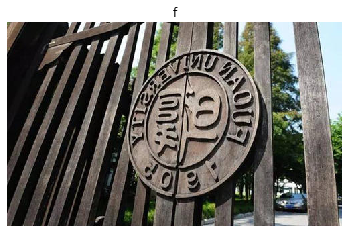

In [4]:
import cv2

#read image
image = cv2.imread('fudan.jpg')

#print image, reture a numpy array
#print(image)

# print(f "width :{image.shape[1]} pixels")

# 格式为H x W x C, 高度x宽度x通道数 默认（BGR）
# 注意jupyter notebook上无法使用cv2.imshow
# cv2.imshow('image', image)
# 停止图片显示
# cv2.waitKey(0)

# 翻转cv2.flip() 1水平翻转，0垂直翻转，-1 水平+垂直翻转 
flipped_im = cv2.flip(image,1)
cv2_imshow('f',flipped_im)
cv2.waitKey(0)
cv2.destroyAllWindows()
# 裁切 numpy的切片操作
# 例如：image[x1:x2, y1:y2]

# 窗口名称、numpy对象
# cv2.imwrite('new_fudan.jpg', image)

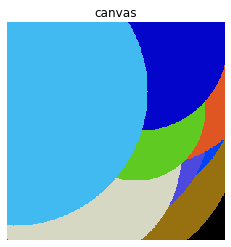

In [5]:
# 基本线条操作，例如cv2.line(), cv2.circle(), cv2.rectangle(), cv2.ellipse, cv2.putText()
import cv2
import numpy as np 

canvas = np.zeros((300,300,3), dtype= "uint8")
for _ in range(0,25):
    rediuas = np.random.randint(5,200)
    color = np.random.randint(0, 256, size=(3,)).tolist()
    pt = np.random.randint(0,200, size =(2,))
    cv2.circle(canvas, tuple(pt), rediuas, color, -1) #随机圆心、半径、和颜色

# cv2.imshow('Canvas', canvas)
# cv2.waitKey(0)

cv2_imshow('canvas',canvas)

### 图像算数操作紧记数据类型，和取值范围

对于RGB来说，取值范围：[0,255]

OpenCV （截断操作） 和 numpy的差异（取模操作+-256）

In [6]:
import numpy as np
import cv2 as cv 

x,y = np.uint8([100]), np.uint8([200])
print(cv.add(x,y))
print(cv.subtract(x, y))
print(x + y) # 100 + 200 - 256
print(x - y) # 100 - 200 + 256

[[255]]
[[0]]
[44]
[156]


### 位操作 灰度图像像素级别的布尔运算

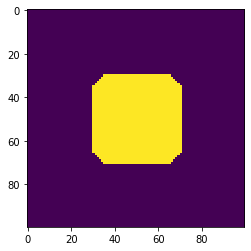

In [7]:
import cv2
import numpy as np 

rectangle = np.zeros((100,100), dtype= 'uint8')
# 灰度背景 0 

cv2.rectangle(rectangle, (30,30),(70,70), 255, -1)
# 背景里面加一个rectangle
# cv2_imshow('rectangle', rectangle)

circle = np.zeros((100,100), dtype= 'uint8')
cv2.circle(circle, (50,50), 25, 255, -1)
# cv2_imshow('circle', circle)

# 比特运算
bitwiseAnd = cv2.bitwise_and(rectangle, circle)
# print(bitwiseAnd)

plt.imshow(bitwiseAnd)
cv2_imshow = ('and', bitwiseAnd)

### crop操作，masking操作（保持了原有坐标信息）

the hight is 304, the width is 500, and the channel is 3


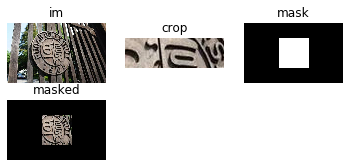

In [11]:
import cv2 
import numpy as np 
%matplotlib inline

im = cv2.imread('fudan.jpg')

# 高度x宽度x通道
print('the hight is {}, the width is {}, and the channel is {}'.format(im.shape[0], im.shape[1], im.shape[2]))

plt.subplot(3,3,1)
cv2_imshow('im',im)

plt.subplot(3,3,2)

# crop裁剪，numpy操作
c_im = im[100:130, 200:300]
cv2_imshow('crop', c_im)

# masking 操作
plt.subplot(3,3,3)
mask = np.zeros(im.shape[:2], dtype= "uint8")
(cx,cy) = (im.shape[1]//2, im.shape[0]//2)
cv2.rectangle(mask, (cx - 75, cy-75), (cx +75, cy+75), 255, -1)
cv2_imshow('mask', mask)

masked = cv2.bitwise_and(im,im, mask = mask) #mask 里面为255白色， 其他为0黑色

plt.subplot(3,3,4)
cv2_imshow('masked', masked)
plt.show()

### 图像色彩通道的分离和融合 （本质为，图像维度的变换）

In [3]:
import numpy as np 
import cv2 

im = cv2.imread('fudan.jpg')

# 色彩分离 （本质为 B = im[:,:,0], 再转换到二维数据类型)
(B,G,R) = cv2.split(im)

print(B.shape, B.ndim, im.shape, im.ndim)

# 融合
merged = cv2.merge([B,G,R])

cv2.imshow("G", G)
cv2.waitKey(0)
cv2.destroyAllWindows()

plt.subplot(2,2,1) 
cv2_imshow("R", R)

plt.subplot(2,2,2)
cv2_imshow('G', G)

plt.subplot(2,2,3)
cv2_imshow('B', B)

plt.subplot(2,2,4)
cv2_imshow('merged',merged)

(304, 500) 2 (304, 500, 3) 3


NameError: name 'plt' is not defined

### 颜色空间转换

In [ ]:
# 需要在非jupyter平台上实验
cv2.cvtColor(im, cv2.COLOR_BGR2HSV)
cv2.cvtColor(im, cv2.COLOR_BGR2LAB)

### 颜色直方图（像素点的统计）
cv2.calcHist

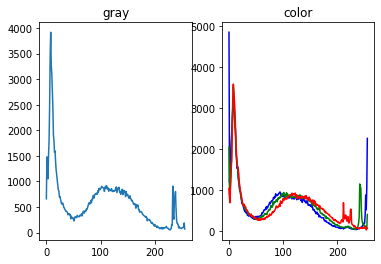

In [13]:
import cv2
from matplotlib import pyplot as plt 

im = cv2.imread('fudan.jpg')

# 转换为灰度图
gray_im = cv2.cvtColor(im, cv2.COLOR_BGR2GRAY) #3维转换为2维，转换的算法？
# print(gray_im.ndim)

hist = cv2.calcHist([gray_im], [0], None, [256], [0,256])
# print(hist)

# 灰度直方图
plt.figure()
p1 = plt.subplot(121)
plt.title ("gray")
p2 = plt.subplot(122)
plt.title('color')
p1.plot(hist)

# 彩色直方图
chans = cv2.split(im)
colors = ('b','g','r')

for (chan, color) in zip (chans, colors):
    hist = cv2.calcHist([chan], [0], None, [256], [0, 256])
    p2.plot(hist, color = color)

plt.show()

In [1]:
import cv2 

im = cv2.imread('fudan.jpg')

cv2.namedWindow('im')
cv2.imshow('im', im)
cv2.waitKey(0) # 程序暂停，等待按键
cv2.destroyAllWindows() #Mac下问题，关不掉，但也无妨，重启kernel即可

In [1]:
import gdal